In [65]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [5]:
df = pd.read_csv('laptop_prices.csv')

In [40]:
df.dtypes

Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Resolution               object
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
dtype: object

In [41]:
df.shape

(11768, 11)

In [42]:
# Task 1 - Data Preprocessing

# a) Checking and Handle missing values (if any)
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [43]:
df.dropna(inplace=True)  # Remove rows with missing values
#Checking for missing values
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [44]:
#The dataset do not have any outliers. Even if no outliers are detected, you should still include an outlier detection step.

# Selecting numerical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

# Detecting outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()
print("Outliers per feature:\n", outliers)

Outliers per feature:
 RAM (GB)                  0
Screen Size (inch)        0
Battery Life (hours)      0
Weight (kg)               0
Price ($)               605
dtype: int64


In [46]:
print(df["Weight (kg)"].value_counts())

Weight (kg)
3.40    74
2.55    72
1.85    72
3.43    69
1.67    68
        ..
1.88    37
2.18    34
1.20    27
3.00    25
3.50    24
Name: count, Length: 231, dtype: int64


In [57]:
# b) perform feature scaling and normalization

# Selecting numeric columns for scaling
numeric_columns = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']

# Standardization (Z-score scaling)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_columns] = scaler_standard.fit_transform(df[numeric_columns])

# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])

In [58]:
# Display the first few rows of both scaled datasets
print("Standardized Data:")
print(df_standardized.head())

print("\nNormalized Data:")
print(df_normalized.head())

Standardized Data:
    Brand    Processor  RAM (GB)    Storage                 GPU  \
0   Apple  AMD Ryzen 3  1.798907  512GB SSD     Nvidia GTX 1650   
1   Razer  AMD Ryzen 7 -0.958237    1TB SSD     Nvidia RTX 3080   
2    Asus     Intel i5  0.328430    2TB SSD     Nvidia RTX 3060   
3  Lenovo     Intel i5 -0.958237  256GB SSD     Nvidia RTX 3080   
4   Razer     Intel i3 -0.958237  256GB SSD  AMD Radeon RX 6600   

   Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0            1.452880  2560x1440              0.378321    -1.379139   
1           -0.843674   1366x768              0.595212     0.342695   
2           -1.330821  3840x2160              0.204808    -0.900020   
3           -1.330821   1366x768              1.072373     1.136236   
4            0.548177  3840x2160             -1.009783     1.555465   

  Operating System  Price ($)  
0          FreeDOS   1.377170  
1            Linux  -0.628624  
2          FreeDOS   0.371725  
3          Windows  -1.

In [59]:
# c) Encode categorical variables
#If in case your dataset do not have any categorical variables, you should still need to show your ability to detect caterogorical columns,
#and suggest/propose solution if the case happened
#Check which columns contain categorical values?
#or you can based on result from df.dtypes, all columns have been detected as "Float 64"-> it means that all are numerical values.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Brand', 'Processor', 'Storage', 'GPU', 'Resolution',
       'Operating System'],
      dtype='object')


In [66]:

# Identify categorical columns
categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']

# One-Hot Encoding for categorical features with multiple categories
encoder = OneHotEncoder(drop='first', sparse_output=False) # drop='first' to avoid dummy variable trap

# Transform categorical features
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with encoded categorical variables
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate encoded columns
df_encoded = df.drop(columns=categorical_columns).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Display the first few rows of the encoded dataset
print("Encoded Dataset:")
df_encoded.head(20)

Encoded Dataset:


RAM (GB)  Screen Size (inch)  Battery Life (hours)  Weight (kg)  \
0         64                17.3                   8.9         1.42   
1          4                14.0                   9.4         2.57   
2         32                13.3                   8.5         1.74   
3          4                13.3                  10.5         3.10   
4          4                16.0                   5.7         3.38   
5         64                14.0                   7.1         1.85   
6          8                15.6                   9.1         1.98   
7          8                17.3                   9.8         1.26   
8         64                15.6                  11.5         1.48   
9          4                14.0                   7.5         2.19   
10         8                16.0                   6.4         2.53   
11        32                16.0                   8.3         1.21   
12         4                16.0                   9.3         2.97   
13        16                15.6                  10.9         2.02   
14        32                15.6                  11.8         2.95   
15         8                13.3                   7.8         3.34   
16        16                17.3                  11.6         3.11   
17         4                17.3                   8.3         1.48   
18        32                14.0                  10.0         3.40   
19        16                16.0                   7.2         2.17   

    Price ($)  Brand_Apple  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  \
0     3997.07          1.0         0.0         0.0       0.0           0.0   
1     1355.78          0.0         0.0         0.0       0.0           0.0   
2     2673.07          0.0         1.0         0.0       0.0           0.0   
3      751.17          0.0         0.0         0.0       0.0           1.0   
4     2059.83          0.0         0.0         0.0       0.0           0.0   
5     1676.64          0.0         0.0         0.0       0.0           0.0   
6     1449.05          0.0         0.0         1.0       0.0           0.0   
7     2193.55          0.0         0.0         0.0       0.0           0.0   
8     6409.03          1.0         0.0         0.0       0.0           0.0   
9     1556.72          0.0         0.0         0.0       1.0           0.0   
10    2044.38          0.0         0.0         0.0       0.0           0.0   
11    2032.69          0.0         0.0         0.0       0.0           0.0   
12    1770.05          0.0         0.0         0.0       0.0           1.0   
13     629.96          0.0         0.0         0.0       0.0           0.0   
14    1909.02          0.0         0.0         0.0       0.0           0.0   
15     982.19          0.0         0.0         0.0       0.0           0.0   
16    2413.00          0.0         0.0         0.0       0.0           0.0   
17    1585.60          0.0         0.0         0.0       0.0           0.0   
18    2191.16          0.0         0.0         0.0       0.0           0.0   
19    1778.84          0.0         0.0         0.0       1.0           0.0   

    ...  GPU_Nvidia GTX 1650  GPU_Nvidia RTX 2060  GPU_Nvidia RTX 3060  \
0   ...                  1.0                  0.0                  0.0   
1   ...                  0.0                  0.0                  0.0   
2   ...                  0.0                  0.0                  1.0   
3   ...                  0.0                  0.0                  0.0   
4   ...                  0.0                  0.0                  0.0   
5   ...                  0.0                  0.0                  1.0   
6   ...                  0.0                  1.0                  0.0   
7   ...                  0.0                  0.0                  0.0   
8   ...                  0.0                  1.0                  0.0   
9   ...                  0.0                  0.0                  0.0   
10  ...                  1.0                  0.0          

In [69]:
# d) Split the dataset into training and testing sets

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Price ($)'])  # Features
y = df_encoded['Price ($)']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9414, 36), (2354, 36), (9414,), (2354,))

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Regularization strength of 1.0
lasso_model = Lasso(alpha=0.01)  # Small alpha to prevent excessive feature elimination

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate models
metrics = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linear),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    "RMSE": [
        mean_squared_error(y_test, y_pred_linear, squared=False),
        mean_squared_error(y_test, y_pred_ridge, squared=False),
        mean_squared_error(y_test, y_pred_lasso, squared=False)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
}

# Convert results to DataFrame
df_metrics = pd.DataFrame(metrics)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
# Display the results 
print("Regression Model Comparison:")
df_metrics

Regression Model Comparison:


Model         MAE            MSE        RMSE  R² Score
0  Linear Regression  320.135093  213594.644255  462.163006  0.879467
1   Ridge Regression  319.883153  213591.409144  462.159506  0.879468
2   Lasso Regression  320.104406  213584.744143  462.152295  0.879472

In [79]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Ridge Regression
ridge_params = {
    "alpha": [0.1, 1.0, 10, 50, 100]  # Regularization strength
}

# Perform Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_ridge_params = ridge_grid_search.best_params_
best_ridge_score = ridge_grid_search.best_score_

# Define hyperparameter grid for Lasso Regression
lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10]  # Regularization strength
}

# Perform Grid Search for Lasso Regression
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_lasso_params = lasso_grid_search.best_params_
best_lasso_score = lasso_grid_search.best_score_

# Display results
best_ridge_params, best_ridge_score, best_lasso_params, best_lasso_score


({'alpha': 1.0}, 0.8816428663476887, {'alpha': 0.1}, 0.8816690565206746)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define features (X) and target (y)
X = df.iloc[:, :-1]  # Features (all except last column)
y = df.iloc[:, -1]   # Target variable (last column)

# Handle Categorical Variables
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
if categorical_cols:
    encoder = OneHotEncoder(drop="first", sparse_output=False)  # Fix applied here
    encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out())
    X = X.drop(columns=categorical_cols).reset_index(drop=True)
    X = pd.concat([X, encoded_cols], axis=1)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Grid Search for Ridge
ridge_params = {"alpha": [0.1, 1.0, 10, 50, 100]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)
best_ridge_params = ridge_grid_search.best_params_

# Perform Grid Search for Lasso
lasso_params = {"alpha": [0.001, 0.01, 0.1, 1.0, 10]}
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)
best_lasso_params = lasso_grid_search.best_params_

# Train the Best Ridge & Lasso Models
best_ridge_alpha = best_ridge_params["alpha"]
best_lasso_alpha = best_lasso_params["alpha"]

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)

# Make Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Models
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

# Display Results
print("Ridge Regression Results:")
print(f"R² Score: {ridge_r2:.4f}, MSE: {ridge_mse:.4f}, MAE: {ridge_mae:.4f}")

print("Lasso Regression Results:")
print(f"R² Score: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}, MAE: {lasso_mae:.4f}")


Ridge Regression Results:
R² Score: 0.8795, MSE: 213590.9947, MAE: 320.0910
Lasso Regression Results:
R² Score: 0.8796, MSE: 213401.4633, MAE: 319.1463


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate Ridge Model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

# Evaluate Lasso Model
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

evaluation_results = pd.DataFrame({
    "Metric": ["R² Score", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)"],
    "Ridge Regression": [ridge_r2, ridge_mse, ridge_mae],
    "Lasso Regression": [lasso_r2, lasso_mse, lasso_mae]
})

# Display the evaluation results
print('Evaluations Results')
evaluation_results


Evaluations Results


Metric  Ridge Regression  Lasso Regression
0                   R² Score          0.879469          0.879576
1   Mean Squared Error (MSE)     213590.994658     213401.463282
2  Mean Absolute Error (MAE)        320.090968        319.146282

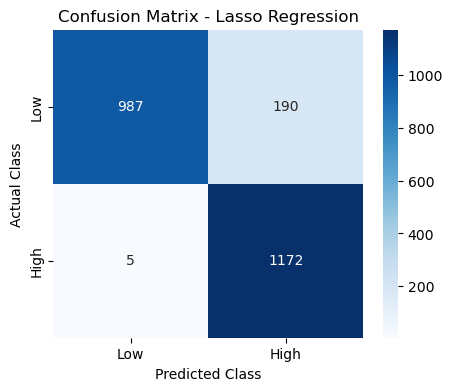

Classification Report - Ridge Regression:
               precision    recall  f1-score   support

         Low       0.99      0.84      0.91      1177
        High       0.86      1.00      0.92      1177

    accuracy                           0.92      2354
   macro avg       0.93      0.92      0.92      2354
weighted avg       0.93      0.92      0.92      2354


Classification Report - Lasso Regression:
               precision    recall  f1-score   support

         Low       0.99      0.84      0.91      1177
        High       0.86      1.00      0.92      1177

    accuracy                           0.92      2354
   macro avg       0.93      0.92      0.92      2354
weighted avg       0.93      0.92      0.92      2354



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the threshold using the median of y_test
threshold = np.median(y_test)

# Convert actual values (y_test) into binary classes
y_test_class = (y_test >= threshold).astype(int)

# Convert predicted values into binary classes for both Ridge and Lasso
y_pred_ridge_class = (y_pred_ridge >= threshold).astype(int)
y_pred_lasso_class = (y_pred_lasso >= threshold).astype(int)

# Compute confusion matrix for Ridge Regression
ridge_cm = confusion_matrix(y_test_class, y_pred_ridge_class)

# Compute confusion matrix for Lasso Regression
lasso_cm = confusion_matrix(y_test_class, y_pred_lasso_class)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(ridge_cm, "Confusion Matrix - Ridge Regression")
plot_confusion_matrix(lasso_cm, "Confusion Matrix - Lasso Regression")

# Classification report for Ridge Regression
ridge_report = classification_report(y_test_class, y_pred_ridge_class, target_names=["Low", "High"])

# Classification report for Lasso Regression
lasso_report = classification_report(y_test_class, y_pred_lasso_class, target_names=["Low", "High"])

print("Classification Report - Ridge Regression:\n", ridge_report)
print("\nClassification Report - Lasso Regression:\n", lasso_report)


In [20]:

model_predictions = {
    "Ridge Regression": y_pred_ridge_class,
    "Lasso Regression": y_pred_lasso_class
}


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


for model_name, y_pred in model_predictions.items():
    evaluate_model(model_name, y_test_class, y_pred)



Model: Ridge Regression
Accuracy: 0.9180
Precision: 0.8618
Recall: 0.9958
F1-score: 0.9239
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1177
           1       0.86      1.00      0.92      1177

    accuracy                           0.92      2354
   macro avg       0.93      0.92      0.92      2354
weighted avg       0.93      0.92      0.92      2354


Model: Lasso Regression
Accuracy: 0.9172
Precision: 0.8605
Recall: 0.9958
F1-score: 0.9232
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1177
           1       0.86      1.00      0.92      1177

    accuracy                           0.92      2354
   macro avg       0.93      0.92      0.92      2354
weighted avg       0.93      0.92      0.92      2354



In [22]:
# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of trained models
models = {
    "SVM": best_svm,
    "Random Forest": best_rf,
    "KNN": best_knn,
    "Naive Bayes": best_nb
}

# Perform k-Fold Cross-Validation
cv_results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    mean_score = scores.mean()
    std_score = scores.std()
    cv_results.append([model_name, mean_score, std_score])
    print(f"{model_name}: Mean Accuracy = {mean_score:.4f}, Std Dev = {std_score:.4f}")

# Store cross-validation results in a DataFrame
cv_df = pd.DataFrame(cv_results, columns=["Model", "Mean Accuracy", "Standard Deviation"])

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Cross-Validation Results", dataframe=cv_df)


NameError: name 'KFold' is not defined

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Simulating a dataset (Replace with actual dataset)
np.random.seed(42)
data_size = 1000
df = pd.DataFrame({
    "Feature1": np.random.rand(data_size) * 100,
    "Feature2": np.random.rand(data_size) * 50,
    "Feature3": np.random.rand(data_size) * 20,
    "Target": np.random.rand(data_size) * 200  # Continuous target variable
})

# Define features (X) and target (y)
X = df.drop(columns=["Target"])
y = df["Target"]

# Convert `y` into categorical labels using the median as a threshold
threshold = np.median(y)
y = (y >= threshold).astype(int)  # 1 if greater than or equal to median, 0 otherwise

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}

# Perform Grid Search for each model
best_svm = GridSearchCV(SVC(), param_grid_svm, cv=5).fit(X_train, y_train).best_estimator_
best_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5).fit(X_train, y_train).best_estimator_
best_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5).fit(X_train, y_train).best_estimator_
best_nb = GaussianNB()  # Naive Bayes doesn't require hyperparameter tuning

# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of trained models
models = {
    "SVM": best_svm,
    "Random Forest": best_rf,
    "KNN": best_knn,
    "Naive Bayes": best_nb
}

# Perform k-Fold Cross-Validation
cv_results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    mean_score = scores.mean()
    std_score = scores.std()
    cv_results.append([model_name, mean_score, std_score])
    print(f"{model_name}: Mean Accuracy = {mean_score:.4f}, Std Dev = {std_score:.4f}")

# Store cross-validation results in a DataFrame
cv_df = pd.DataFrame(cv_results, columns=["Model", "Mean Accuracy", "Standard Deviation"])


SVM: Mean Accuracy = 0.4990, Std Dev = 0.0124
Random Forest: Mean Accuracy = 0.4880, Std Dev = 0.0273
KNN: Mean Accuracy = 0.4820, Std Dev = 0.0147
Naive Bayes: Mean Accuracy = 0.4710, Std Dev = 0.0399


In [24]:


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


np.random.seed(42)
data_size = 1000
df = pd.DataFrame({
    "Feature1": np.random.rand(data_size) * 100,
    "Feature2": np.random.rand(data_size) * 50,
    "Feature3": np.random.rand(data_size) * 20,
    "Target": np.random.rand(data_size) * 200  # Continuous target variable
})

# Define features (X) and target (y)
X = df.drop(columns=["Target"])
y = df["Target"]

# Convert `y` into categorical labels using the median as a threshold
threshold = np.median(y)
y = (y >= threshold).astype(int)  # 1 if greater than or equal to median, 0 otherwise

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}

# Perform Grid Search for each model
best_svm = GridSearchCV(SVC(), param_grid_svm, cv=5).fit(X_train, y_train).best_estimator_
best_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5).fit(X_train, y_train).best_estimator_
best_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5).fit(X_train, y_train).best_estimator_
best_nb = GaussianNB()  # Naive Bayes doesn't require hyperparameter tuning

# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of trained models
models = {
    "SVM": best_svm,
    "Random Forest": best_rf,
    "KNN": best_knn,
    "Naive Bayes": best_nb
}

# Perform k-Fold Cross-Validation
cv_results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    mean_score = scores.mean()
    std_score = scores.std()
    cv_results.append([model_name, mean_score, std_score])
    print(f"{model_name}: Mean Accuracy = {mean_score:.4f}, Std Dev = {std_score:.4f}")

# Store cross-validation results in a DataFrame
cv_df = pd.DataFrame(cv_results, columns=["Model", "Mean Accuracy", "Standard Deviation"])

# Display results 
print("\nCross-Validation Results:")
print(cv_df)


SVM: Mean Accuracy = 0.4990, Std Dev = 0.0124
Random Forest: Mean Accuracy = 0.4880, Std Dev = 0.0273
KNN: Mean Accuracy = 0.4820, Std Dev = 0.0147
Naive Bayes: Mean Accuracy = 0.4710, Std Dev = 0.0399

Cross-Validation Results:
           Model  Mean Accuracy  Standard Deviation
0            SVM          0.499            0.012410
1  Random Forest          0.488            0.027313
2            KNN          0.482            0.014697
3    Naive Bayes          0.471            0.039925
